# Netflix Movies and TV Shows_EDA & Visualization Task

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import missingno as msno
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
file_path = os.getenv('HOME')+'/datathon/data/netflix_titles.csv'

data = pd.read_csv(file_path)
data

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

## Column Description

- show_id: unique id of each show

- type: The category of a show, can be either a Movie or a TV Show

- title: Name of the show

- director: Name of the directors of the show

- cast: Name of actors and other cast of the show

- country: Name of countries the show is available to watch on Netflix

- date_added: Date when the show was added on Netflix

- release_year: Release year of the show

- rating: Show rating on netflix

- duration: Time duration of the show

- listed_in: Genre of the show

- description: Some text describing the show

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Missing Value

<AxesSubplot:>

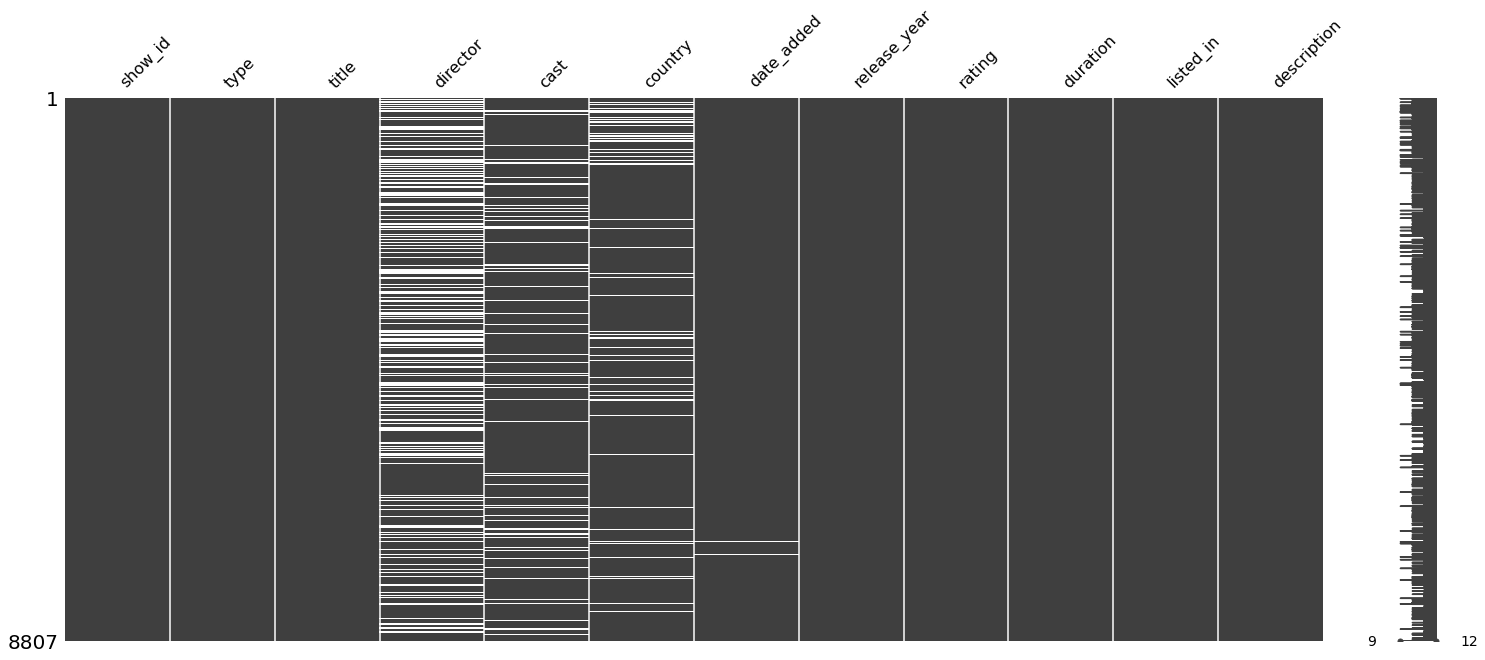

In [4]:
msno.matrix(data)

<AxesSubplot:>

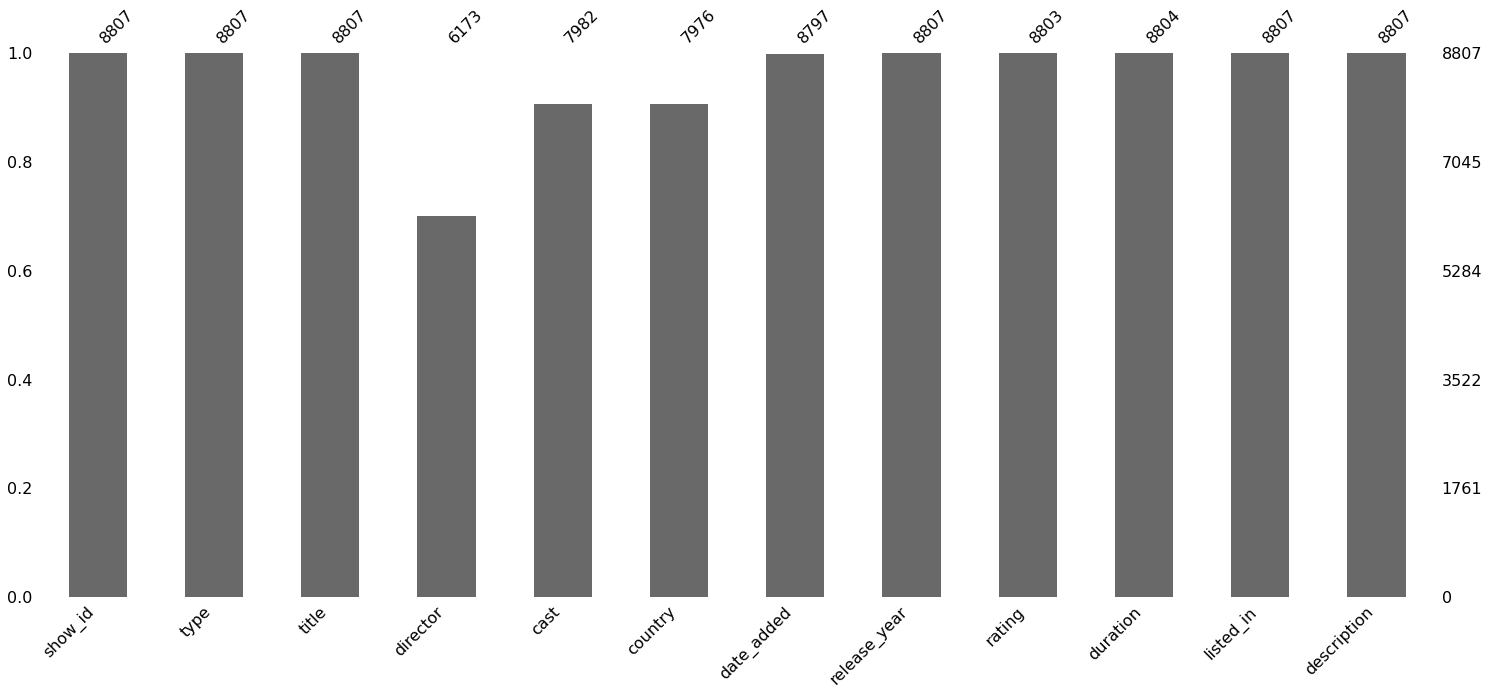

In [5]:
msno.bar(data)

In [6]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

- director, cast 컬럼은 결측치가 많고, 적절한 보간 아이디어가 떠오르지 않아 제거해주었습니다.

In [7]:
data.drop(['show_id', 'director', 'cast'], axis=1, inplace=True)

data

type                  title        country          date_added  \
0       Movie   Dick Johnson Is Dead  United States  September 25, 2021   
1     TV Show          Blood & Water   South Africa  September 24, 2021   
2     TV Show              Ganglands            NaN  September 24, 2021   
3     TV Show  Jailbirds New Orleans            NaN  September 24, 2021   
4     TV Show           Kota Factory          India  September 24, 2021   
...       ...                    ...            ...                 ...   
8802    Movie                 Zodiac  United States   November 20, 2019   
8803  TV Show            Zombie Dumb            NaN        July 1, 2019   
8804    Movie             Zombieland  United States    November 1, 2019   
8805    Movie                   Zoom  United States    January 11, 2020   
8806    Movie                 Zubaan          India       March 2, 2019   

      release_year rating   duration  \
0             2020  PG-13     90 min   
1             2021  TV-MA  2 Seasons   
2             2021  TV-MA   1 Season   
3             2021  TV-MA   1 Season   
4             2021  TV-MA  2 Seasons   
...            ...    ...        ...   
8802          2007      R    158 min   
8803          2018  TV-Y7  2 Seasons   
8804          2009      R     88 min   
8805          2006     PG     88 min   
8806          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 9 columns]

## Type

In [8]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

<AxesSubplot:xlabel='type', ylabel='count'>

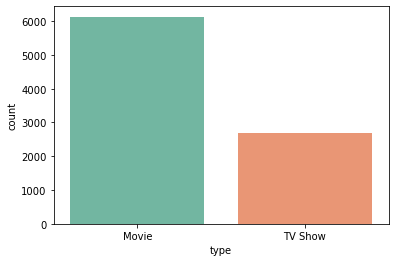

In [9]:
sns.countplot(x='type', data=data, palette='Set2')

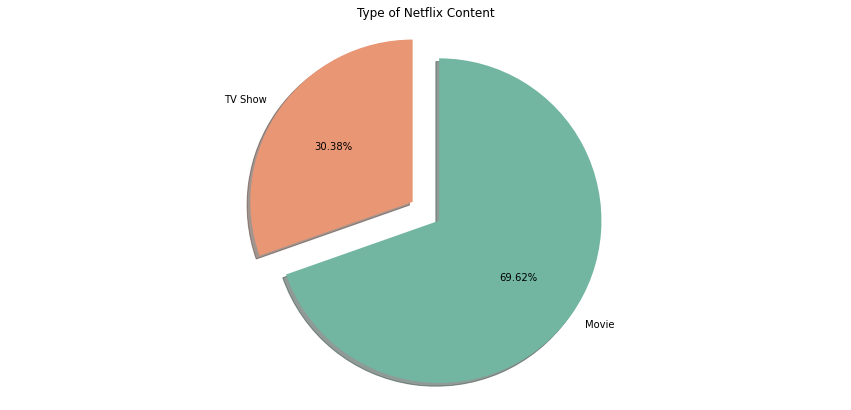

In [10]:
plt.figure(figsize=(15, 7))

labels = ['TV Show', 'Movie']

plt.pie(data['type'].value_counts().sort_values(),
        labels=labels,
        explode=[0.1,0.1],
        autopct='%1.2f%%',
        colors=['#e99675', '#72b6a1'],
        startangle=90,
        shadow=True)

plt.title('Type of Netflix Content')

plt.axis('equal')

plt.show()

- 간단한 countplot 과 pieplot 을 활용하여 Type 별 데이터 분포를 확인할 수 있었습니다.

## Country

In [11]:
data['country'].isna().sum()

831

In [12]:
data = data[data["country"].notna()]

data['country'].isna().sum()

0

In [13]:
country_count = data['country'].value_counts().sort_values(ascending=False)
country_count = pd.DataFrame(country_count)
country_count

country
United States                                          2818
India                                                   972
United Kingdom                                          419
Japan                                                   245
South Korea                                             199
...                                                     ...
Ireland, United Kingdom, Greece, France, Nether...        1
France, Canada, Italy, United States, China               1
United States, Venezuela                                  1
United Kingdom, Canada, Japan                             1
United Arab Emirates, Jordan                              1

[748 rows x 1 columns]

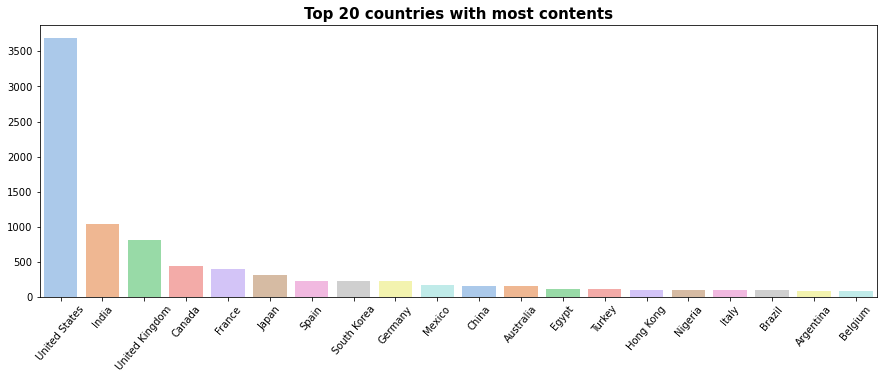

In [14]:
country_data = data['country']

country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace( ', ',',').split(',')))).sort_values(ascending=False)

top20country = country_count.head(20)

plt.figure(figsize=(15,5))
sns.barplot(x=top20country.index, y=top20country, palette="pastel")
plt.xticks(rotation=50)
plt.title('Top 20 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

In [15]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

# geoplot
country_with_code, country = {}, {}
for c, v in dict(country_count).items():
    code = ""
    if c.lower() in country_codes:
        code = country_codes[c.lower()]
    country_with_code[code] = v
    country[c] = v

geo_data = [dict(type = 'choropleth',
             locations = list(country_with_code.keys()),
             z = list(country_with_code.values()),
             colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                           [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
             autocolorscale = False,
             reversescale = True,
             marker = dict(line = dict(color = 'gray', width = 0.5)),
             colorbar = dict(autotick = False, title = ''),
           )]

layout = dict(
            title = '',
            geo = dict(
                showframe = False,
                showcoastlines = False,
                projection = dict(
                type = 'Mercator'
                )
            )
        )

fig = dict(data=geo_data, layout=layout)
iplot(fig, validate=False, filename='d3-world-map')
plt.show()

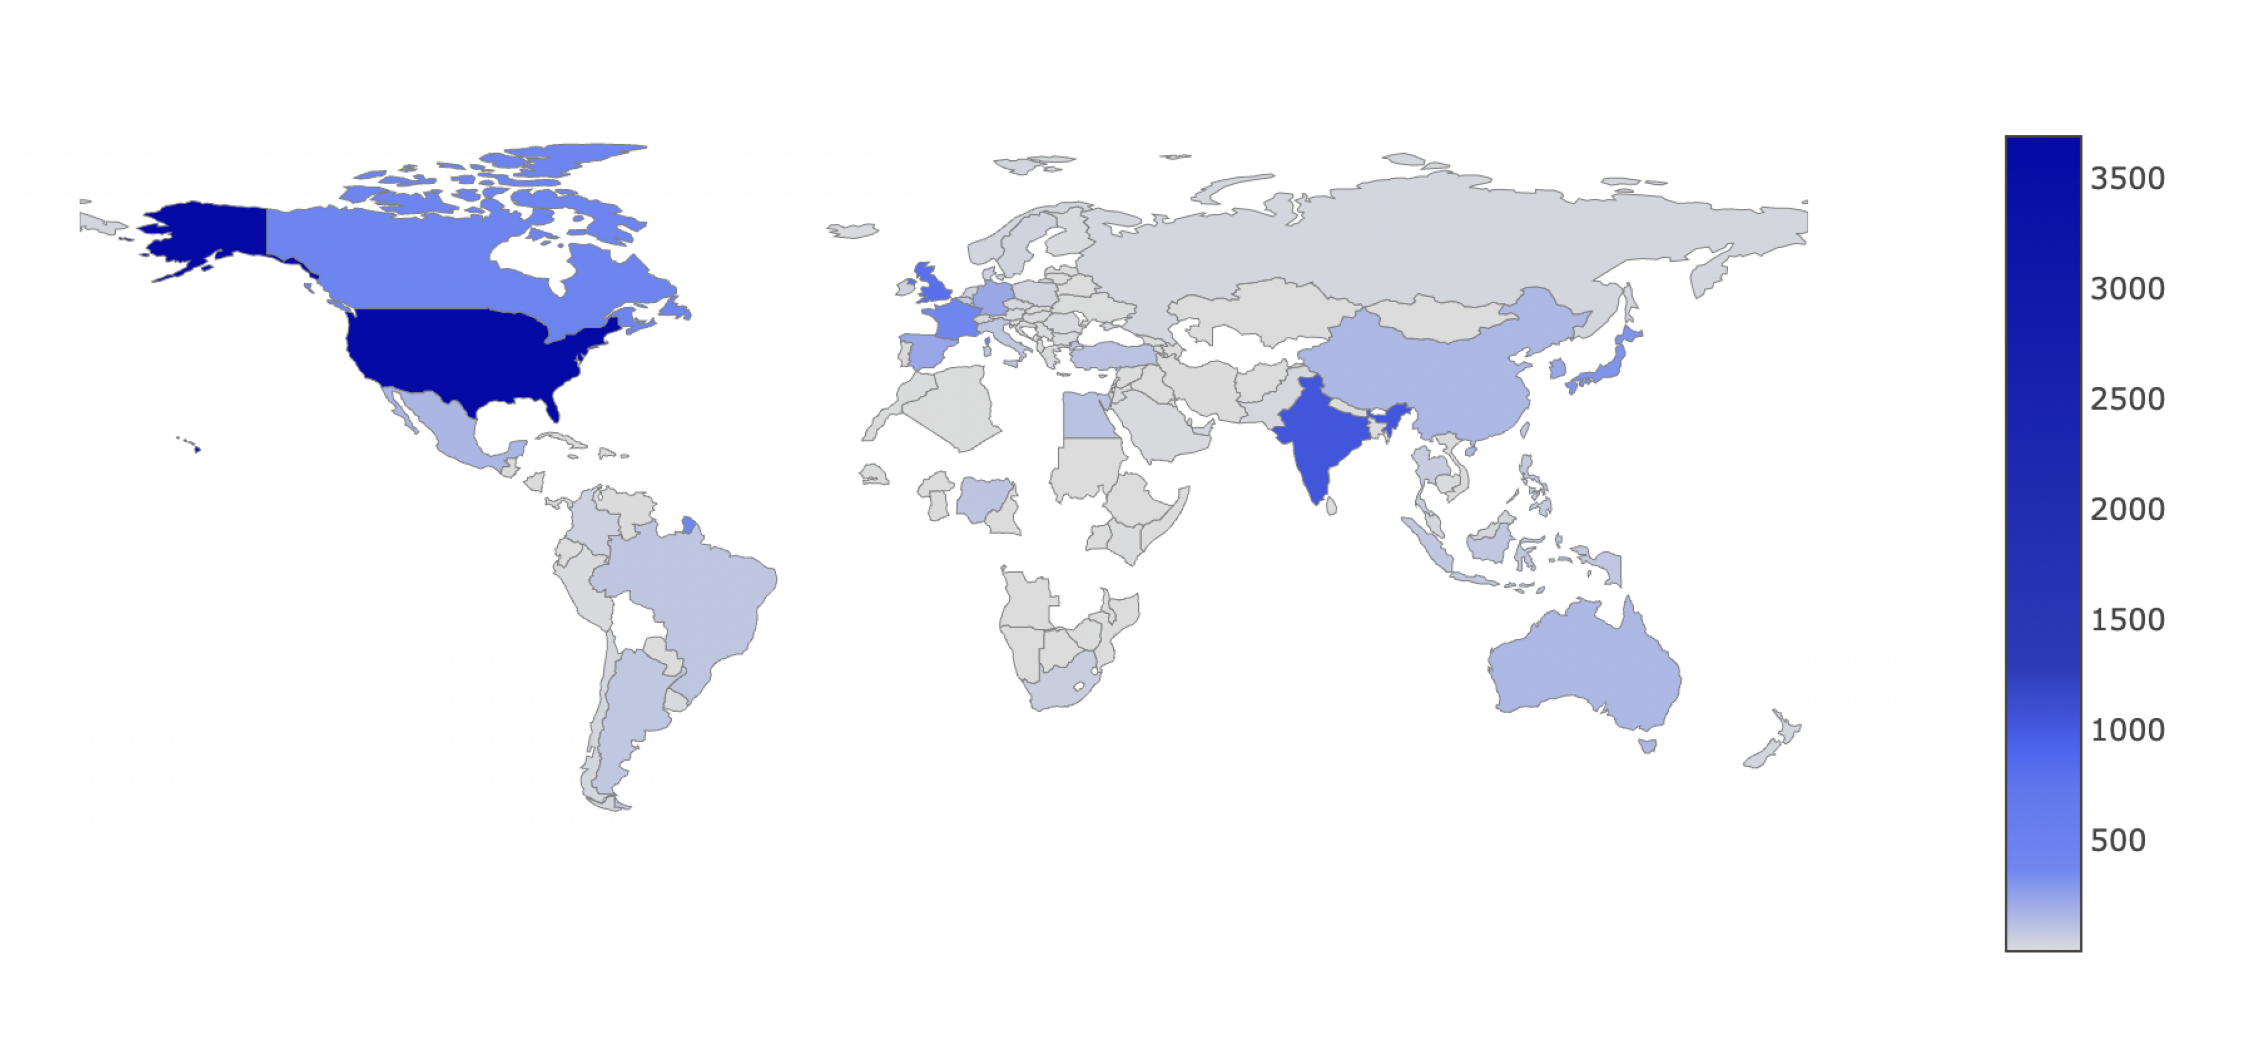

In [16]:
img_path = os.getenv('HOME')+'/datathon/images/choroplethmap.png'

img = mpimg.imread(img_path)

plt.figure(figsize=(40, 40))
plt.axis('off')
plt.imshow(img)

- iplot 라이브러리를 활용하여 choropleth map 를 그릴 수 있습니다.
<br>
<br>
- choropleth 에 대한 자세한 내용은 다음 링크를 참고
<br>
<br>
- [choropleth-maps spec](https://plotly.com/python/choropleth-maps/)

- 미국에서 출시한 콘텐츠의 수가 압도적으로 많습니다.

## Date_Added

In [17]:
data['date_added'].isna().sum()

9

- 콘텐츠 업로드 날짜에는 9 개의 결측치가 있습니다.

In [18]:
data = data[data["date_added"].notna()]

data['date_added'].isna().sum()

0

- 결측치 9 건을 제거해주었습니다.

In [19]:
data.head()

type                          title  \
0    Movie           Dick Johnson Is Dead   
1  TV Show                  Blood & Water   
4  TV Show                   Kota Factory   
7    Movie                        Sankofa   
8  TV Show  The Great British Baking Show   

                                             country          date_added  \
0                                      United States  September 25, 2021   
1                                       South Africa  September 24, 2021   
4                                              India  September 24, 2021   
7  United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                     United Kingdom  September 24, 2021   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
4          2021  TV-MA  2 Seasons   
7          1993  TV-MA    125 min   
8          2021  TV-14  9 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
4  International TV Shows, Romantic TV Shows, TV ...   
7   Dramas, Independent Movies, International Movies   
8                       British TV Shows, Reality TV   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
4  In a city of coaching centers known to train I...  
7  On a photo shoot in Ghana, an American model s...  
8  A talented batch of amateur bakers face off in...

In [20]:
data['date_added'] = pd.to_datetime(data['date_added'])

data.head()

type                          title  \
0    Movie           Dick Johnson Is Dead   
1  TV Show                  Blood & Water   
4  TV Show                   Kota Factory   
7    Movie                        Sankofa   
8  TV Show  The Great British Baking Show   

                                             country date_added  release_year  \
0                                      United States 2021-09-25          2020   
1                                       South Africa 2021-09-24          2021   
4                                              India 2021-09-24          2021   
7  United States, Ghana, Burkina Faso, United Kin... 2021-09-24          1993   
8                                     United Kingdom 2021-09-24          2021   

  rating   duration                                          listed_in  \
0  PG-13     90 min                                      Documentaries   
1  TV-MA  2 Seasons    International TV Shows, TV Dramas, TV Mysteries   
4  TV-MA  2 Seasons  International TV Shows, Romantic TV Shows, TV ...   
7  TV-MA    125 min   Dramas, Independent Movies, International Movies   
8  TV-14  9 Seasons                       British TV Shows, Reality TV   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
4  In a city of coaching centers known to train I...  
7  On a photo shoot in Ghana, an American model s...  
8  A talented batch of amateur bakers face off in...

- date_added 컬럼의 format 을 datetime 으로 변경해주었습니다.

In [21]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

data.head()

type                          title  \
0    Movie           Dick Johnson Is Dead   
1  TV Show                  Blood & Water   
4  TV Show                   Kota Factory   
7    Movie                        Sankofa   
8  TV Show  The Great British Baking Show   

                                             country date_added  release_year  \
0                                      United States 2021-09-25          2020   
1                                       South Africa 2021-09-24          2021   
4                                              India 2021-09-24          2021   
7  United States, Ghana, Burkina Faso, United Kin... 2021-09-24          1993   
8                                     United Kingdom 2021-09-24          2021   

  rating   duration                                          listed_in  \
0  PG-13     90 min                                      Documentaries   
1  TV-MA  2 Seasons    International TV Shows, TV Dramas, TV Mysteries   
4  TV-MA  2 Seasons  International TV Shows, Romantic TV Shows, TV ...   
7  TV-MA    125 min   Dramas, Independent Movies, International Movies   
8  TV-14  9 Seasons                       British TV Shows, Reality TV   

                                         description  year_added  month_added  
0  As her father nears the end of his life, filmm...        2021            9  
1  After crossing paths at a party, a Cape Town t...        2021            9  
4  In a city of coaching centers known to train I...        2021            9  
7  On a photo shoot in Ghana, an American model s...        2021            9  
8  A talented batch of amateur bakers face off in...        2021            9

- year_added 컬럼과 month_added 컬럼을 추가해주었습니다.

Text(28.911361111111106, 0.5, 'counts')

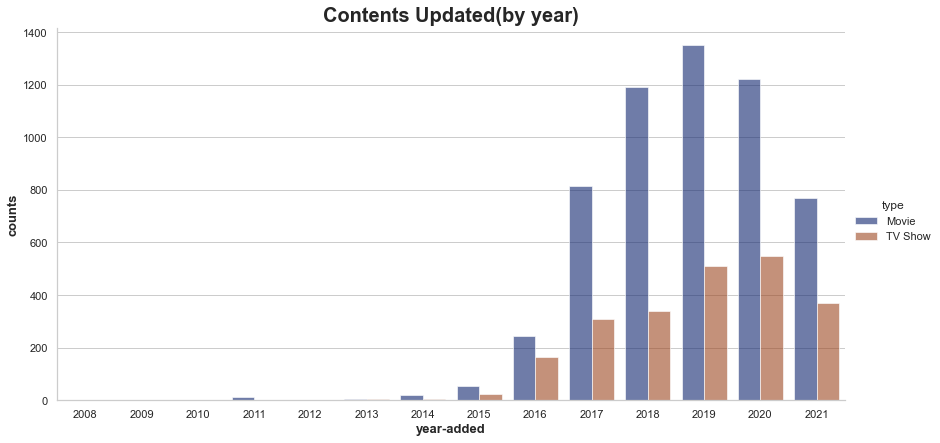

In [22]:
sns.set_theme(style="whitegrid")

sns.catplot(
    data=data, kind="count",
    x="year_added", hue="type",
    ci="sd", palette="dark", alpha=.6, height=6, aspect=2
)

plt.title("Contents Updated(by year)", fontsize=20, fontweight='bold')
plt.xlabel("year-added", fontsize=13, fontweight='bold')
plt.ylabel("counts", fontsize=13, fontweight='bold')

- 연도별 콘텐츠 업데이트 추이 비교

Text(28.313393807870376, 0.5, 'counts')

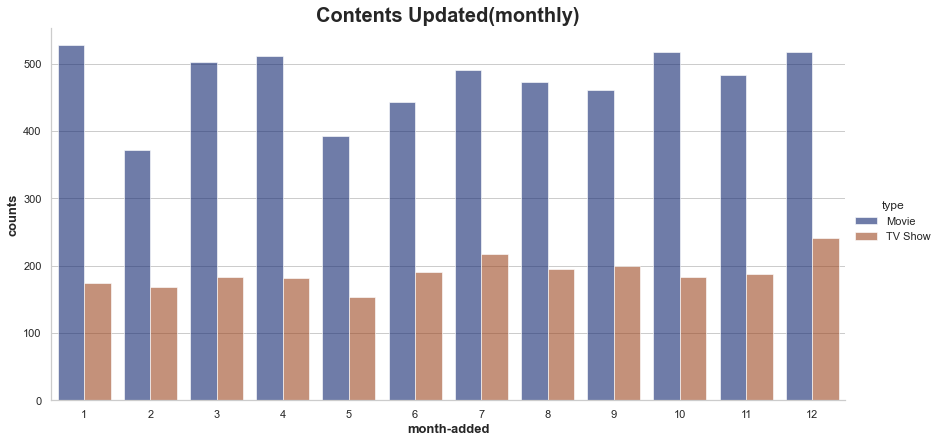

In [23]:
sns.set_theme(style="whitegrid")

sns.catplot(
    data=data, kind="count",
    x="month_added", hue="type",
    ci="sd", palette="dark", alpha=.6, height=6, aspect=2
)

plt.title("Contents Updated(monthly)", fontsize=20, fontweight='bold')
plt.xlabel("month-added", fontsize=13, fontweight='bold')
plt.ylabel("counts", fontsize=13, fontweight='bold')

- 월별 콘텐츠 업데이트 추이 비교

In [24]:
movie_data = data[data['type'] == 'Movie']
show_data = data[data['type'] == 'TV Show']

movie_count = movie_data.groupby(['year_added', 'month_added']).size().reset_index(name='counts')
show_count = show_data.groupby(['year_added', 'month_added']).size().reset_index(name='counts')

print(movie_count.tail())
print('-'*40)
print(show_count.tail())

     year_added  month_added  counts
99         2021            5      70
100        2021            6      89
101        2021            7     101
102        2021            8      91
103        2021            9      89
----------------------------------------
    year_added  month_added  counts
83        2021            5      27
84        2021            6      58
85        2021            7      61
86        2021            8      38
87        2021            9      37


- type 별로 나누어 year 와 month 를 기준으로 groupby 하고, 각 데이터의 counts 컬럼을 생성해주었습니다.

In [25]:
movie_pivot = movie_count.pivot("month_added", "year_added", "counts")
show_pivot = show_count.pivot("month_added", "year_added", "counts")

movie_pivot = movie_pivot.fillna(0).astype(int)
show_pivot = show_pivot.fillna(0).astype(int)

movie_pivot

year_added   2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
month_added                                                                     
1               1     0     0     0     0     0     2     0    15    57   103   
2               0     0     0     0     1     0     1     3     9    65    60   
3               0     0     0     0     0     0     0     2    14    86   135   
4               0     0     0     0     0     0     1     1    14    66    86   
5               0     1     0     1     0     0     0     5     8    62    66   
6               0     0     0     0     0     0     1     4    11    64    49   
7               0     0     0     0     0     0     1     5    19    45   124   
8               0     0     0     0     0     0     1     2    23    70   128   
9               0     0     0     1     0     1     1     6    23    71    78   
10              0     0     0    11     0     1     4    10    31    96   134   
11              0     1     1     0     1     2     2     2    25    54   115   
12              0     0     0     0     1     2     5    14    52    78   114   

year_added   2019  2020  2021  
month_added                    
1             110   147    92  
2             102    69    62  
3             114    86    66  
4             110   124   110  
5              83    96    70  
6             115   110    89  
7              96    99   101  
8              81    76    91  
9              83   108    89  
10            118   113     0  
11            180   100     0  
12            157    95     0

Text(0.5, 1.0, 'TV Show Contents Updated')

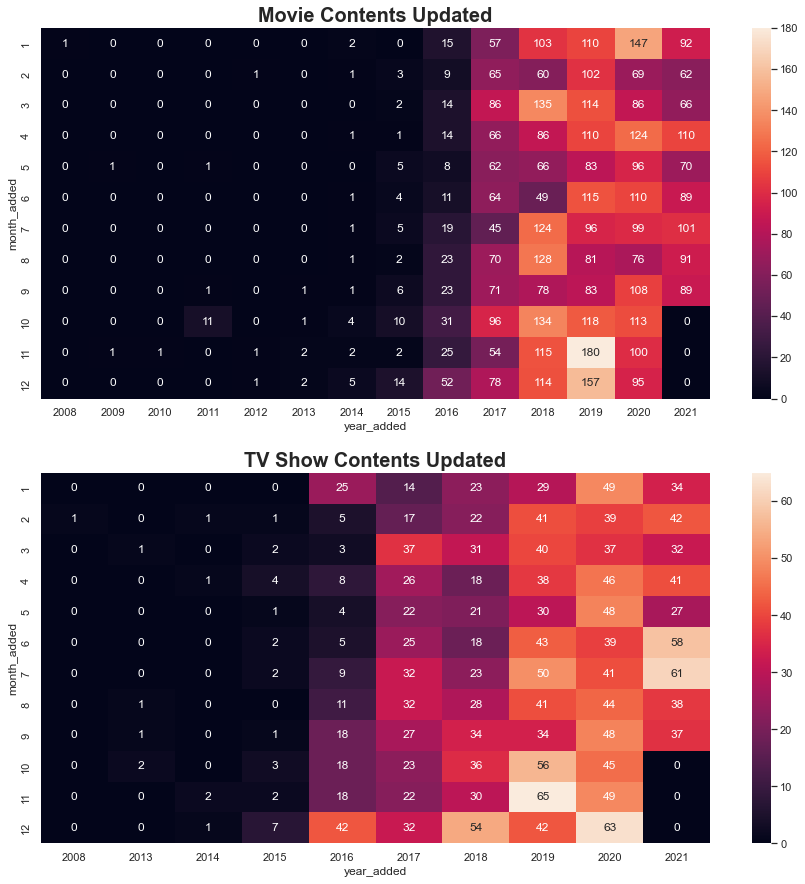

In [26]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 1, 1)
sns.heatmap(movie_pivot, annot=True, fmt="d")
plt.title("Movie Contents Updated", fontsize=20, fontweight='bold')

plt.subplot(2, 1, 2)
sns.heatmap(show_pivot, annot=True, fmt="d")
plt.title("TV Show Contents Updated", fontsize=20, fontweight='bold')

## Release_year

In [27]:
data['release_year'].isna().sum()

0

In [28]:
top20years = data['release_year'].value_counts().sort_values(ascending=False).index[0:20]

top20years

Int64Index([2018, 2017, 2019, 2020, 2016, 2015, 2021, 2014, 2013, 2012, 2011,
            2010, 2009, 2008, 2006, 2007, 2005, 2004, 2003, 2002],
           dtype='int64')

Text(0, 0.5, 'counts')

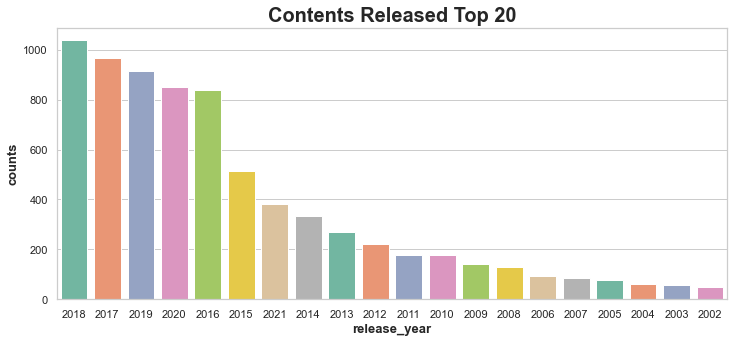

In [29]:
plt.figure(figsize=(12, 5))

sns.countplot(x="release_year", data=data, palette="Set2", order=top20years)

plt.title("Contents Released Top 20", fontsize=20, fontweight='bold')
plt.xlabel("release_year", fontsize=13, fontweight='bold')
plt.ylabel("counts", fontsize=13, fontweight='bold')

- 16 ~ 20 년도 사이에 가장 많은 콘텐츠들이 release 되었음을 확인할 수 있습니다.

In [30]:
movie_top20years = movie_data['release_year'].value_counts().sort_values(ascending=False).index[0:20]
show_top20years = show_data['release_year'].value_counts().sort_values(ascending=False).index[0:20]

print("movie_top20years:", movie_top20years)
print('-'*60)
print("show_top20years:", show_top20years)

movie_top20years: Int64Index([2017, 2018, 2016, 2019, 2020, 2015, 2014, 2013, 2021, 2012, 2010,
            2011, 2008, 2009, 2006, 2007, 2005, 2004, 2003, 2002],
           dtype='int64')
------------------------------------------------------------
show_top20years: Int64Index([2020, 2019, 2018, 2017, 2021, 2016, 2015, 2014, 2013, 2012, 2011,
            2010, 2009, 2008, 2006, 2005, 2007, 2004, 1999, 2003],
           dtype='int64')


- Type 별로 나누어 release 추이를 살펴보도록 하겠습니다.

Text(0, 0.5, 'counts')

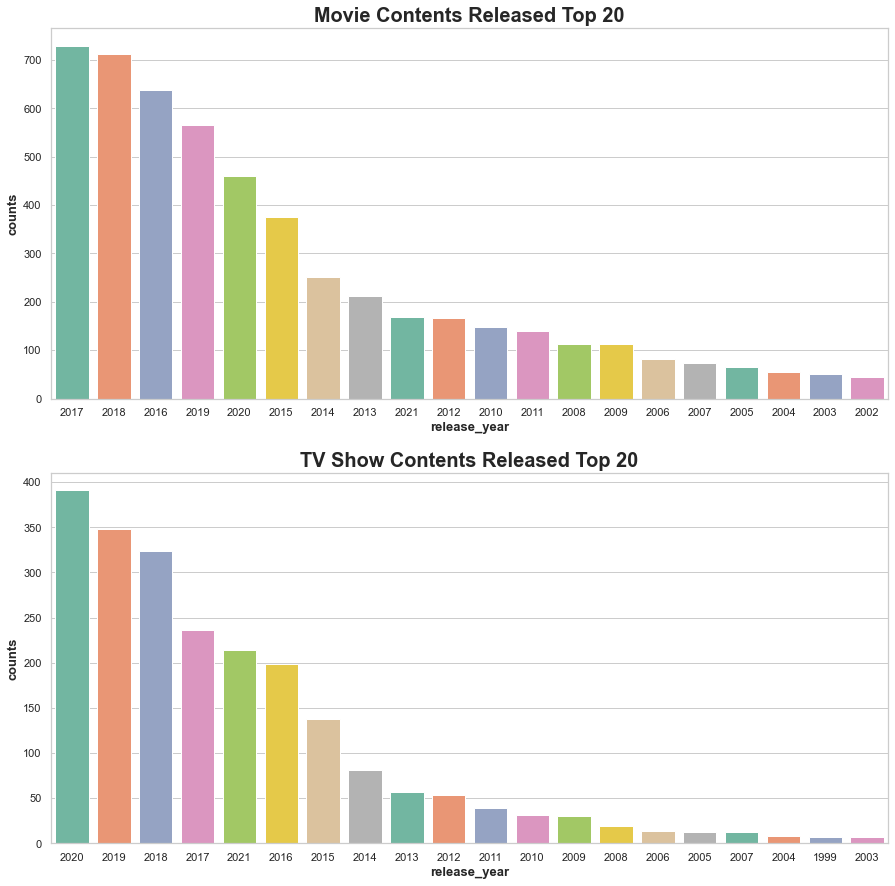

In [31]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 1, 1)
sns.countplot(x="release_year", data=movie_data, palette="Set2", order=movie_top20years)
plt.title("Movie Contents Released Top 20", fontsize=20, fontweight='bold')
plt.xlabel("release_year", fontsize=13, fontweight='bold')
plt.ylabel("counts", fontsize=13, fontweight='bold')

plt.subplot(2, 1, 2)
sns.countplot(x="release_year", data=show_data, palette="Set2", order=show_top20years)
plt.title("TV Show Contents Released Top 20", fontsize=20, fontweight='bold')
plt.xlabel("release_year", fontsize=13, fontweight='bold')
plt.ylabel("counts", fontsize=13, fontweight='bold')

## Rating

In [32]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'TV-14', 'TV-Y7', 'PG', 'R', 'TV-PG', 'TV-Y',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', nan, 'UR'], dtype=object)

- '74 min', '84 min', '66 min' 과 같이, rating 컬럼과 관련이 없는 이상치가 존재하는 것을 확인할 수 있습니다.

In [33]:
data[data['rating'] == '74 min']

type            title        country date_added  release_year  rating  \
5541  Movie  Louis C.K. 2017  United States 2017-04-04          2017  74 min   

     duration listed_in                                        description  \
5541      NaN    Movies  Louis C.K. muses on religion, eternal love, gi...   

      year_added  month_added  
5541        2017            4

In [34]:
data[data['rating'] == '84 min']

type                  title        country date_added  release_year  \
5794  Movie  Louis C.K.: Hilarious  United States 2016-09-16          2010   

      rating duration listed_in  \
5794  84 min      NaN    Movies   

                                            description  year_added  \
5794  Emmy-winning comedy writer Louis C.K. brings h...        2016   

      month_added  
5794            9

In [35]:
data[data['rating'] == '66 min']

type                                 title        country date_added  \
5813  Movie  Louis C.K.: Live at the Comedy Store  United States 2016-08-15   

      release_year  rating duration listed_in  \
5813          2015  66 min      NaN    Movies   

                                            description  year_added  \
5813  The comic puts his trademark hilarious/thought...        2016   

      month_added  
5813            8

- duration 의 데이터가 rating 데이터로 잘못 입력된 케이스로 판단되었습니다.

In [36]:
data.loc[5541, 'duration'] = data[data['rating'] == '74 min']['rating'].values[0]
data.loc[5794, 'duration'] = data[data['rating'] == '84 min']['rating'].values[0]
data.loc[5813, 'duration'] = data[data['rating'] == '66 min']['rating'].values[0]

data.loc[[5541, 5794, 5813]]

type                                 title        country date_added  \
5541  Movie                       Louis C.K. 2017  United States 2017-04-04   
5794  Movie                 Louis C.K.: Hilarious  United States 2016-09-16   
5813  Movie  Louis C.K.: Live at the Comedy Store  United States 2016-08-15   

      release_year  rating duration listed_in  \
5541          2017  74 min   74 min    Movies   
5794          2010  84 min   84 min    Movies   
5813          2015  66 min   66 min    Movies   

                                            description  year_added  \
5541  Louis C.K. muses on religion, eternal love, gi...        2017   
5794  Emmy-winning comedy writer Louis C.K. brings h...        2016   
5813  The comic puts his trademark hilarious/thought...        2016   

      month_added  
5541            4  
5794            9  
5813            8

In [37]:
data.loc[5541, 'rating'] = 'TV-MA'

data.loc[5541]

type                                                        Movie
title                                             Louis C.K. 2017
country                                             United States
date_added                                    2017-04-04 00:00:00
release_year                                                 2017
rating                                                      TV-MA
duration                                                   74 min
listed_in                                                  Movies
description     Louis C.K. muses on religion, eternal love, gi...
year_added                                                   2017
month_added                                                     4
Name: 5541, dtype: object

- Louis C.K. 2017 은 'TV-MA' 시청등급을 직접 입력해주었습니다.

In [38]:
data = data.drop([5794, 5813])

- 나머지 두 콘텐츠는 시청등급이 평가되지 않아 제거해주었습니다.

In [39]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'TV-14', 'TV-Y7', 'PG', 'R', 'TV-PG', 'TV-Y',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', nan, 'UR'], dtype=object)

- 더이상 이상치가 존재하지 않는 것을 확인할 수 있습니다.

In [40]:
data['rating'].isna().sum()

3

- 시청등급에는 3 개의 결측치가 존재하고 있습니다.

In [41]:
data[data['rating'].isna()]

type                              title    country date_added  \
6827  TV Show  Gargantia on the Verdurous Planet      Japan 2016-12-01   
7312  TV Show                       Little Lunch  Australia 2018-02-01   
7537    Movie               My Honor Was Loyalty      Italy 2017-03-01   

      release_year rating  duration                             listed_in  \
6827          2013    NaN  1 Season  Anime Series, International TV Shows   
7312          2015    NaN  1 Season                 Kids' TV, TV Comedies   
7537          2015    NaN   115 min                                Dramas   

                                            description  year_added  \
6827  After falling through a wormhole, a space-dwel...        2016   
7312  Adopting a child's perspective, this show take...        2018   
7537  Amid the chaos and horror of World War II, a c...        2017   

      month_added  
6827           12  
7312            2  
7537            3

- 3 개 결측치에 대한 시청등급을 직접 찾아 입력해주도록 하겠습니다.

In [42]:
data.loc[6827, 'rating'] = 'TV-14'
data.loc[7312, 'rating'] = 'TV-MA'
data.loc[7537, 'rating'] = 'PG-13'

data.loc[[6827, 7312, 7537]]

type                              title    country date_added  \
6827  TV Show  Gargantia on the Verdurous Planet      Japan 2016-12-01   
7312  TV Show                       Little Lunch  Australia 2018-02-01   
7537    Movie               My Honor Was Loyalty      Italy 2017-03-01   

      release_year rating  duration                             listed_in  \
6827          2013  TV-14  1 Season  Anime Series, International TV Shows   
7312          2015  TV-MA  1 Season                 Kids' TV, TV Comedies   
7537          2015  PG-13   115 min                                Dramas   

                                            description  year_added  \
6827  After falling through a wormhole, a space-dwel...        2016   
7312  Adopting a child's perspective, this show take...        2018   
7537  Amid the chaos and horror of World War II, a c...        2017   

      month_added  
6827           12  
7312            2  
7537            3

In [43]:
print("missing no:", data['rating'].isna().sum())
print("rating unique data:", data['rating'].unique())

missing no: 0
rating unique data: ['PG-13' 'TV-MA' 'TV-14' 'TV-Y7' 'PG' 'R' 'TV-PG' 'TV-Y' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


- 이상치와 결정치가 모두 수정되었음을 확인할 수 있습니다.

In [44]:
rating_count = data.groupby(['rating']).size().reset_index(name='counts')

rating_count

rating  counts
0          G      41
1      NC-17       3
2         NR      79
3         PG     281
4      PG-13     483
5          R     788
6      TV-14    1928
7       TV-G     190
8      TV-MA    2931
9      TV-PG     771
10      TV-Y     227
11     TV-Y7     235
12  TV-Y7-FV       5
13        UR       3

In [45]:
movie_data = data[data['type'] == 'Movie']
movie_count = movie_data.groupby(['rating']).size().reset_index(name='counts')

movie_count

rating  counts
0          G      41
1      NC-17       3
2         NR      75
3         PG     281
4      PG-13     483
5          R     787
6      TV-14    1307
7       TV-G     109
8      TV-MA    1925
9      TV-PG     504
10      TV-Y      84
11     TV-Y7      83
12  TV-Y7-FV       4
13        UR       3

Text(0.5, 1.0, 'Rating Counts')

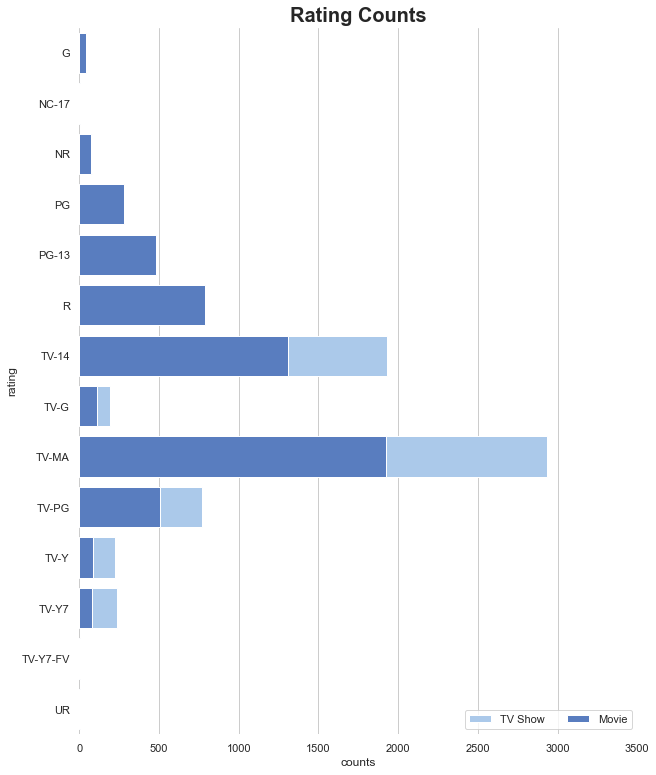

In [46]:
f, ax = plt.subplots(figsize=(10, 13))

sns.set_color_codes("pastel")
sns.barplot(x="counts", y="rating", data=rating_count,
            label="TV Show", color="b")

sns.set_color_codes("muted")
sns.barplot(x="counts", y="rating", data=movie_count,
            label="Movie", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 3500), ylabel="rating",
       xlabel="counts")
sns.despine(left=True, bottom=True)

plt.title("Rating Counts", fontsize=20, fontweight='bold')

- TV-14(만 14세 미만 아동들의 시청이 부적절) 시청등급의 콘텐츠들이 다수 존재하고 있습니다.
<br>
<br>
- 특히, TV-MA(성인용) 시청등급의 콘텐츠 수가 가장 많은 비율을 차지하고 있습니다.
<br>
<br>
- 반면에 G(전체관람가), TV-Y 와 TV-Y7(어린이 대상 콘텐츠) 시청등급의 콘텐츠들은 그 수가 굉장히 적습니다.

## Duration

In [47]:
data['duration'].isna().sum()

0

In [48]:
movie_data = data[data['type'] == 'Movie']
show_data = data[data['type'] == 'TV Show']

print("Movie duration Unique Data:\n", movie_data['duration'].unique())
print('-'*70)
print("TV Show duration Unique Data:\n", show_data['duration'].unique())

Movie duration Unique Data:
 ['90 min' '125 min' '104 min' '127 min' '166 min' '103 min' '97 min'
 '106 min' '96 min' '124 min' '116 min' '98 min' '91 min' '115 min'
 '122 min' '99 min' '88 min' '100 min' '102 min' '93 min' '95 min'
 '85 min' '83 min' '182 min' '147 min' '92 min' '80 min' '128 min'
 '143 min' '119 min' '114 min' '94 min' '118 min' '108 min' '117 min'
 '121 min' '142 min' '113 min' '154 min' '120 min' '82 min' '109 min'
 '101 min' '105 min' '86 min' '229 min' '76 min' '89 min' '110 min'
 '156 min' '112 min' '129 min' '107 min' '135 min' '136 min' '165 min'
 '150 min' '133 min' '145 min' '64 min' '59 min' '70 min' '111 min'
 '69 min' '87 min' '148 min' '189 min' '141 min' '130 min' '81 min'
 '68 min' '131 min' '126 min' '155 min' '123 min' '84 min' '13 min'
 '77 min' '61 min' '74 min' '49 min' '58 min' '72 min' '78 min' '132 min'
 '140 min' '138 min' '149 min' '33 min' '15 min' '224 min' '162 min'
 '60 min' '65 min' '137 min' '75 min' '32 min' '158 min' '164 min'
 '173 m

- Movie 는 min 으로, TV Show 는 seasons 로 표현되어 있습니다.

In [49]:
movie_data['duration'] = movie_data['duration'].apply(lambda x: x.replace(' min', ''))
movie_data['duration'] = movie_data['duration'].astype(int)

movie_data

type                 title  \
0     Movie  Dick Johnson Is Dead   
7     Movie               Sankofa   
9     Movie          The Starling   
12    Movie          Je Suis Karl   
24    Movie                 Jeans   
...     ...                   ...   
8801  Movie               Zinzana   
8802  Movie                Zodiac   
8804  Movie            Zombieland   
8805  Movie                  Zoom   
8806  Movie                Zubaan   

                                                country date_added  \
0                                         United States 2021-09-25   
7     United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
9                                         United States 2021-09-24   
12                              Germany, Czech Republic 2021-09-23   
24                                                India 2021-09-21   
...                                                 ...        ...   
8801                       United Arab Emirates, Jordan 2016-03-09   
8802                                      United States 2019-11-20   
8804                                      United States 2019-11-01   
8805                                      United States 2020-01-11   
8806                                              India 2019-03-02   

      release_year rating  duration  \
0             2020  PG-13        90   
7             1993  TV-MA       125   
9             2021  PG-13       104   
12            2021  TV-MA       127   
24            1998  TV-14       166   
...            ...    ...       ...   
8801          2015  TV-MA        96   
8802          2007      R       158   
8804          2009      R        88   
8805          2006     PG        88   
8806          2015  TV-14       111   

                                             listed_in  \
0                                        Documentaries   
7     Dramas, Independent Movies, International Movies   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
24     Comedies, International Movies, Romantic Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, Music & Musicals   

                                            description  year_added  \
0     As her father nears the end of his life, filmm...        2021   
7     On a photo shoot in Ghana, an American model s...        2021   
9     A woman adjusting to life after a loss contend...        2021   
12    After most of her family is murdered in a terr...        2021   
24    When the father of the man she loves insists t...        2021   
...                                                 ...         ...   
8801  Recovering alcoholic Talal wakes up inside a s...        2016   
8802  A political cartoonist, a crime reporter and a...        2019   
8804  Looking to survive in a world taken over by zo...        2019   
8805  Dragged from civilian life, a former superhero...        2020   
8806  A scrappy but poor boy worms his way into a ty...        2019   

      month_added  
0               9  
7               9  
9               9  
12              9  
24              9  
...           ...  
8801            3  
8802           11  
8804           11  
8805            1  
8806            3  

[5689 rows x 11 columns]

Text(0.5, 1.0, 'Movie Duration Density')

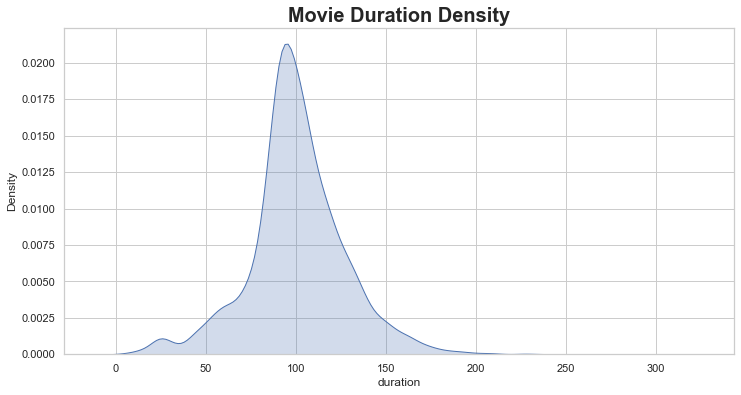

In [50]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=movie_data['duration'], shade=True)
plt.title("Movie Duration Density", fontsize=20, fontweight='bold')

- 90 min ~ 100 min 사이의 duration 을 가지는 Movie 데이터가 가장 많습니다.
<br>
<br>
- 10분 이하의 duration 을 가지는 Movie 데이터들이 이상치가 아닌지 확인해보겠습니다.

In [51]:
movie_outlier = movie_data[movie_data['duration'] < 10]

movie_outlier

type             title        country date_added  release_year rating  \
1484  Movie  Cops and Robbers  United States 2020-12-28          2020  PG-13   
1557  Movie            Canvas  United States 2020-12-11          2020      G   
2713  Movie       Sol Levante          Japan 2020-04-02          2020  TV-14   
3777  Movie            Silent  United States 2019-06-04          2014   TV-Y   

      duration                                          listed_in  \
1484         8                                             Dramas   
1557         9                   Children & Family Movies, Dramas   
2713         5  Action & Adventure, Anime Features, Internatio...   
3777         3         Children & Family Movies, Sci-Fi & Fantasy   

                                            description  year_added  \
1484  Animation and activism unite in this multimedi...        2020   
1557  After a heartbreaking loss, a grandfather stru...        2020   
2713  A young warrior and her familiar search for th...        2020   
3777  "Silent" is an animated short film created by ...        2019   

      month_added  
1484           12  
1557           12  
2713            4  
3777            6

- 4 개의 데이터 모두 확인 결과, 단편 애니메이션으로 이상치가 아니었습니다.

In [52]:
show_data_order = show_data['duration'].value_counts().sort_values(ascending=False).index

show_data_order

Index(['1 Season', '2 Seasons', '3 Seasons', '4 Seasons', '5 Seasons',
       '6 Seasons', '7 Seasons', '8 Seasons', '9 Seasons', '10 Seasons',
       '13 Seasons', '15 Seasons', '12 Seasons', '17 Seasons', '11 Seasons'],
      dtype='object')

<AxesSubplot:xlabel='duration', ylabel='count'>

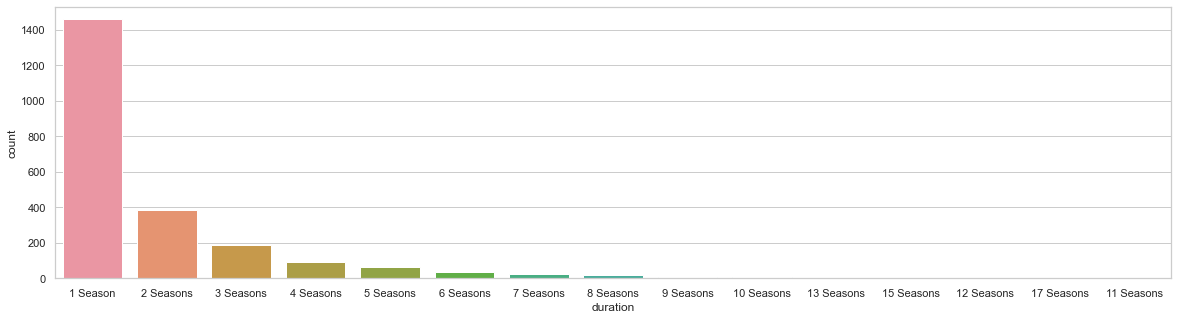

In [53]:
sns.set_style('whitegrid')

plt.figure(figsize=(20, 5))

sns.countplot(x="duration", data=show_data, order=show_data_order)

- TV Show 의 경우, 1 Season duration 을 가지는 데이터가 가장 많았습니다.

In [54]:
show_data['duration'].value_counts()

1 Season      1458
2 Seasons      383
3 Seasons      187
4 Seasons       92
5 Seasons       63
6 Seasons       33
7 Seasons       22
8 Seasons       16
9 Seasons        8
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

## Genre

In [55]:
movie_genres = list(movie_data['listed_in'])
movie_gen = []

for genre in movie_genres:
    temp_list = list(genre.split(','))
    for temp in temp_list:
        movie_gen.append(temp.strip())
        
movie_gen_count = Counter(movie_gen)

In [56]:
movie_gen_count

Counter({'Documentaries': 794,
         'Dramas': 2317,
         'Independent Movies': 745,
         'International Movies': 2543,
         'Comedies': 1580,
         'Romantic Movies': 588,
         'Horror Movies': 340,
         'Sci-Fi & Fantasy': 242,
         'Thrillers': 549,
         'Action & Adventure': 817,
         'Classic Movies': 115,
         'Anime Features': 63,
         'Children & Family Movies': 535,
         'Music & Musicals': 328,
         'Sports Movies': 201,
         'Cult Movies': 70,
         'Faith & Spirituality': 63,
         'LGBTQ Movies': 97,
         'Stand-Up Comedy': 311,
         'Movies': 32})

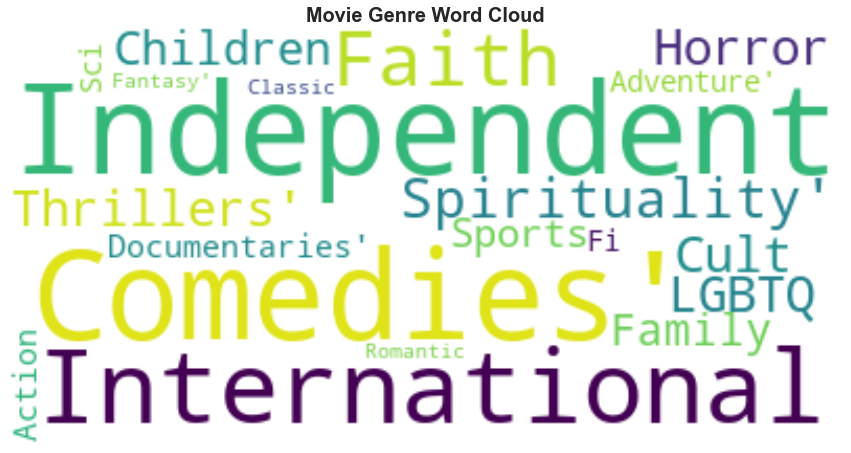

In [57]:
text = list(set(movie_gen))
spwords = set(STOPWORDS)
spwords.add("Movies'")

plt.figure(figsize=(15, 15))

wordcloud = WordCloud(max_words=len(movie_gen_count), 
                      background_color="white", 
                      stopwords=spwords).generate(str(text))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Movie Genre Word Cloud', fontsize=20, fontweight='bold')
plt.show()

- Movie Type 에서는 Independent, Comedies, International 등의 장르가 눈에 띕니다.

In [58]:
show_genres = list(show_data['listed_in'])
show_gen = []

for genre in show_genres:
    temp_list = list(genre.split(','))
    for temp in temp_list:
        show_gen.append(temp.strip())
        
show_gen_count = Counter(show_gen)

In [59]:
show_gen_count

Counter({'International TV Shows': 1127,
         'TV Dramas': 662,
         'TV Mysteries': 92,
         'Romantic TV Shows': 299,
         'TV Comedies': 494,
         'British TV Shows': 236,
         'Reality TV': 205,
         'Crime TV Shows': 420,
         'Spanish-Language TV Shows': 144,
         'TV Action & Adventure': 152,
         'Docuseries': 329,
         "Kids' TV": 369,
         'TV Sci-Fi & Fantasy': 78,
         'Anime Series': 153,
         'Korean TV Shows': 136,
         'Teen TV Shows': 66,
         'TV Horror': 72,
         'TV Shows': 9,
         'Classic & Cult TV': 25,
         'Science & Nature TV': 82,
         'TV Thrillers': 53,
         'Stand-Up Comedy & Talk Shows': 47})

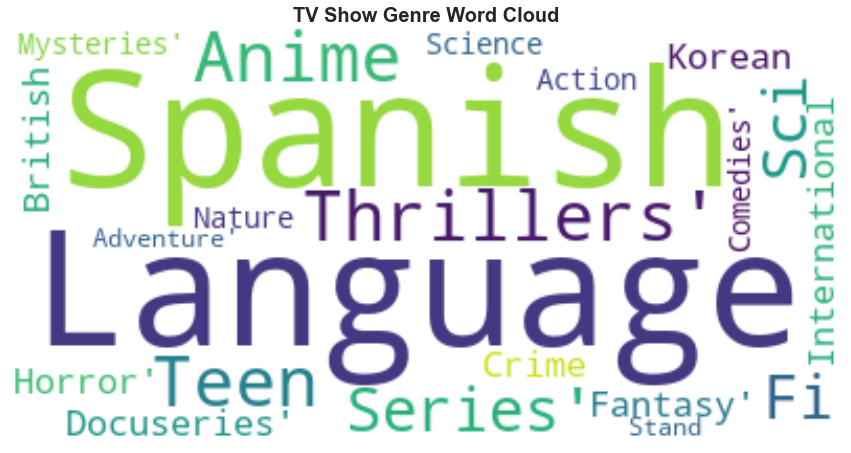

In [60]:
text = list(set(show_gen))
spwords = set(STOPWORDS)
spwords.add("TV")
spwords.add("TV'")
spwords.add("Shows'")

plt.figure(figsize=(15, 15))

wordcloud = WordCloud(max_words=len(show_gen_count), 
                      background_color="white", 
                      stopwords=spwords).generate(str(text))

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('TV Show Genre Word Cloud', fontsize=20, fontweight='bold')
plt.show()

- TV Show 의 Word Cloud 에서는 Spanish-Language, Thriller, Teen, Animation 등의 장르가 눈에 띄고 있습니다. 

In [61]:
genres = list(data['listed_in'])
gen = []

for genre in genres:
    temp_list = list(genre.split(','))
    for temp in temp_list:
        gen.append(temp.strip())
        
gen_count = Counter(gen)

In [62]:
genre_df = pd.DataFrame.from_dict(gen_count, orient='index').reset_index()
genre_df = genre_df.rename(columns={'index':'genre', 0:'count'})

genre_df.head()

genre  count
0           Documentaries    794
1  International TV Shows   1127
2               TV Dramas    662
3            TV Mysteries     92
4       Romantic TV Shows    299

In [63]:
genre_df = genre_df.sort_values('count', ascending=False)[:20]

genre_df

genre  count
8       International Movies   2543
6                     Dramas   2317
11                  Comedies   1580
1     International TV Shows   1127
21        Action & Adventure    817
0              Documentaries    794
7         Independent Movies    745
2                  TV Dramas    662
15           Romantic Movies    588
19                 Thrillers    549
26  Children & Family Movies    535
5                TV Comedies    494
12            Crime TV Shows    420
20                  Kids' TV    369
17             Horror Movies    340
16                Docuseries    329
27          Music & Musicals    328
35           Stand-Up Comedy    311
4          Romantic TV Shows    299
18          Sci-Fi & Fantasy    242

In [64]:
trace1 = go.Bar(x=genre_df['genre'], y=genre_df['count'])
data = [trace1]
layout = go.Layout(title='Genre Counts Top 20')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

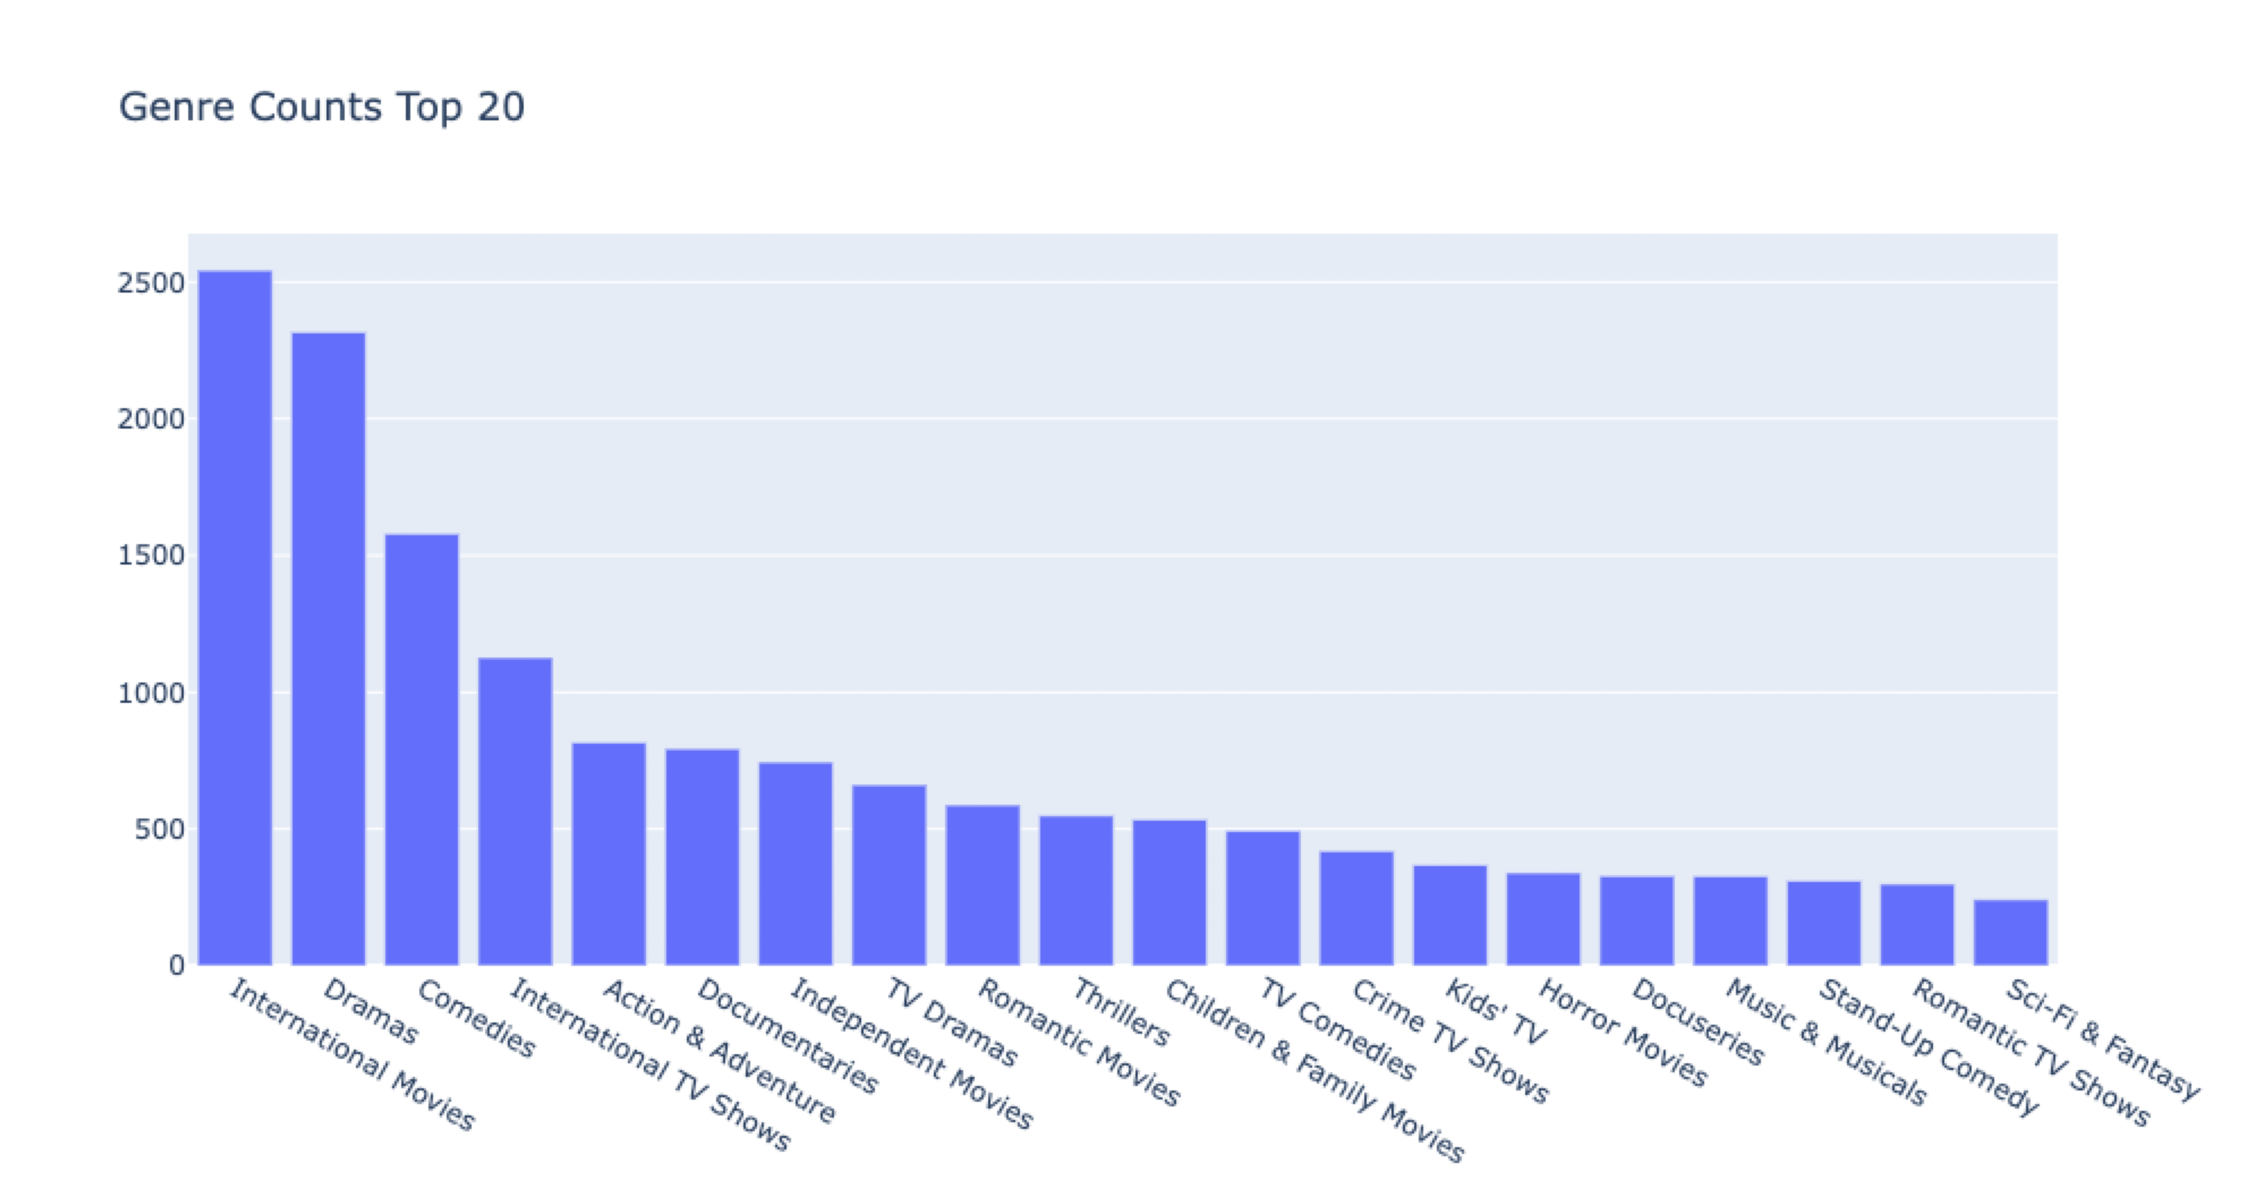

In [65]:
img_path = os.getenv('HOME')+'/datathon/images/genrecounts.png'

img = mpimg.imread(img_path)

plt.figure(figsize=(40, 40))
plt.axis('off')
plt.imshow(img)